In [223]:
#imports

In [224]:
import pandas as pd
import numpy as np
import os
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from sklearn.cluster import KMeans

In [225]:
path = '/Users/hoda/Documents/GitHub/color_quantization/images/color.png'
start = '/Users/hoda'
relative_path = os.path.relpath(path, start) 
print(relative_path)
pic = Image.open('/Users/hoda/Documents/GitHub/color_quantization/images/color.png')

Documents/GitHub/color_quantization/images/color.png


In [226]:
#constants

In [227]:
no_of_pixels = pic.size[0]*pic.size[1]
img_size = pic.size

In [228]:
#image attributes

In [229]:
print(pic.mode)
print(pic.format)
print(img_size)
print(no_of_pixels)

RGB
PNG
(447, 284)
126948


In [230]:
pic.show()

In [231]:
pic.getcolors()

[(70428, (255, 255, 255)),
 (2, (251, 203, 192)),
 (30, (250, 255, 250)),
 (960, (251, 175, 93)),
 (28, (243, 109, 80)),
 (930, (242, 101, 34)),
 (930, (239, 229, 203)),
 (960, (125, 167, 217)),
 (1860, (0, 33, 87)),
 (28, (213, 237, 222)),
 (28, (206, 239, 252)),
 (930, (0, 114, 188)),
 (28, (255, 255, 10)),
 (1860, (160, 65, 13)),
 (930, (158, 11, 15)),
 (28, (151, 151, 255)),
 (28, (255, 255, 156)),
 (28, (146, 255, 146)),
 (1, (139, 255, 139)),
 (1, (138, 255, 138)),
 (28, (137, 255, 255)),
 (1, (255, 255, 149)),
 (930, (130, 123, 0)),
 (2, (129, 255, 255)),
 (960, (125, 125, 125)),
 (960, (115, 99, 87)),
 (28, (255, 227, 227)),
 (930, (102, 45, 145)),
 (930, (96, 57, 19)),
 (28, (255, 170, 255)),
 (930, (89, 133, 39)),
 (930, (0, 91, 127)),
 (960, (61, 181, 74)),
 (1860, (54, 47, 45)),
 (960, (125, 73, 0)),
 (28, (255, 184, 184)),
 (28, (22, 255, 255)),
 (28, (16, 255, 16)),
 (28, (13, 13, 255)),
 (1, (7, 255, 255)),
 (1, (6, 255, 255)),
 (960, (1, 1, 1)),
 (872, (0, 255, 0)),
 (9

In [232]:
no_of_colors = len(pic.getcolors())
print(no_of_colors)

94


In [233]:
df = pd.DataFrame(pic.getcolors(), columns= ['No of pixels', 'Color'])

In [234]:
print(df)

    No of pixels            Color
0          70428  (255, 255, 255)
1              2  (251, 203, 192)
2             30  (250, 255, 250)
3            960   (251, 175, 93)
4             28   (243, 109, 80)
..           ...              ...
89           960   (251, 176, 60)
90           872    (255, 255, 0)
91           930      (13, 0, 76)
92           872      (0, 0, 255)
93             2  (255, 255, 244)

[94 rows x 2 columns]


In [235]:
df = df[['Color', 'No of pixels']]

In [236]:
df.tail()

,Color,No of pixels
89,"(251, 176, 60)",960
90,"(255, 255, 0)",872
91,"(13, 0, 76)",930
92,"(0, 0, 255)",872
93,"(255, 255, 244)",2


In [237]:
percentages = []

In [238]:
for i in range(94):
    percentages.append((df['No of pixels'][i] * 100)/ no_of_pixels)

In [239]:
df['Percentage'] = percentages

In [240]:
df.head()

,Color,No of pixels,Percentage
0,"(255, 255, 255)",70428,55.477833
1,"(251, 203, 192)",2,0.001575
2,"(250, 255, 250)",30,0.023632
3,"(251, 175, 93)",960,0.756215
4,"(243, 109, 80)",28,0.022056


In [241]:
# create the array for the kmeans

In [242]:
colors_list = df['Color']
print(colors_list)

0     (255, 255, 255)
1     (251, 203, 192)
2     (250, 255, 250)
3      (251, 175, 93)
4      (243, 109, 80)
           ...       
89     (251, 176, 60)
90      (255, 255, 0)
91        (13, 0, 76)
92        (0, 0, 255)
93    (255, 255, 244)
Name: Color, Length: 94, dtype: object


In [243]:
R = []
G = []
B = []
for i in range(94):
    (Ri , Gi , Bi) = colors_list[i]
    R.append(Ri)
    G.append(Gi)
    B.append(Bi)     

In [244]:
print(R)

[255, 251, 250, 251, 243, 242, 239, 125, 0, 213, 206, 0, 255, 160, 158, 151, 255, 146, 139, 138, 137, 255, 130, 129, 125, 115, 255, 102, 96, 255, 89, 0, 61, 54, 125, 255, 22, 16, 13, 7, 6, 1, 0, 255, 251, 248, 246, 244, 243, 0, 238, 237, 0, 210, 137, 203, 198, 0, 255, 189, 255, 171, 168, 0, 255, 153, 248, 144, 141, 131, 130, 255, 123, 121, 117, 110, 109, 96, 255, 86, 75, 255, 64, 255, 60, 54, 42, 0, 255, 251, 255, 13, 0, 255]


In [245]:
colors_df = pd.DataFrame(R, columns= ['R'])

In [246]:
colors_df['G'] = G
colors_df['B'] = B

In [247]:
colors_df.head()

,R,G,B
0,255,255,255
1,251,203,192
2,250,255,250
3,251,175,93
4,243,109,80


In [262]:
#perform the elbow method

In [249]:
distances = []
k = range(1,10)
for i in k:
    kmeans = KMeans(n_clusters=i).fit(colors_df)
    kmeans.fit(colors_df)
    distances.append(sum(np.min(cdist(colors_df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / 94)

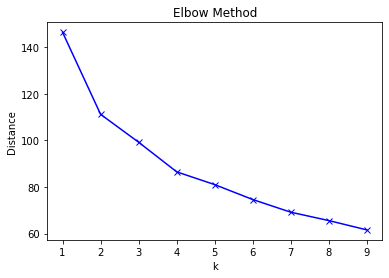

In [250]:
plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('Elbow Method')
plt.show()

In [251]:
#choose k = 4
kmeansModel = KMeans(n_clusters=4).fit(colors_df)

In [252]:
print(kmeansModel.cluster_centers_)

[[205.05       127.25        67.55      ]
 [243.51851852 202.33333333 211.92592593]
 [ 83.09090909 208.40909091 199.04545455]
 [ 59.08        64.56        75.96      ]]


In [253]:
labels = kmeansModel.labels_

In [254]:
print(labels)

[1 1 1 0 0 0 1 2 3 1 1 2 0 0 3 2 1 2 2 2 2 1 0 2 0 3 1 3 3 1 3 3 3 3 3 1 2
 2 3 2 2 3 3 0 1 1 1 1 0 3 0 0 2 1 0 1 0 3 1 1 1 0 0 3 1 0 0 2 0 2 2 1 3 3
 3 2 2 3 1 2 3 1 3 1 2 3 2 2 1 0 0 3 3 1]


In [255]:
label0_size = 0
label1_size = 0
label2_size = 0
label3_size = 0
for i in range(94):
    if(labels[i] == 0):
        label0_size = label0_size +1
    elif(labels[i] == 1):
         label1_size = label1_size +1
    elif(labels[i] == 2):
         label2_size = label2_size +1
    else:
         label3_size = label3_size +1     

In [256]:
print (label2_size)

22


In [257]:
label0_percentage = (label0_size * 100) / no_of_colors
label1_percentage = (label1_size * 100) / no_of_colors
label2_percentage = (label2_size * 100) / no_of_colors
label3_percentage = (label3_size * 100) / no_of_colors

In [258]:
percentages_arr =[]
percentages_arr.append(label0_percentage)
percentages_arr.append(label1_percentage)
percentages_arr.append(label2_percentage)
percentages_arr.append(label3_percentage)
print(percentages_arr)

[21.27659574468085, 28.72340425531915, 23.404255319148938, 26.595744680851062]


In [259]:
#plotting

In [260]:
#square plot
#plt.plot([1, 2, 3], marker=11)
#plt.plot([1, 2, 3], marker=matplotlib.markers.CARETDOWNBASE)

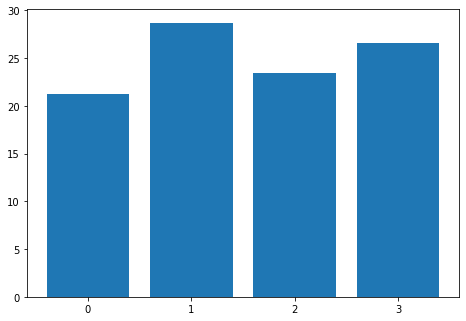

In [261]:
#bar plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['0' ,'1' ,'2' , '3']
ax.bar(label,percentages_arr)
plt.show()

In [ ]:
#quantization

AttributeError: 'Figure' object has no attribute 'imshow'

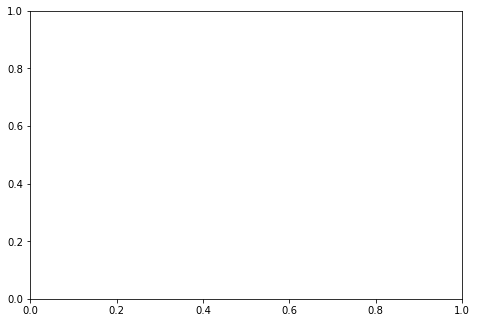

In [264]:
pl = plt.figure()
pl.clf()
ax = pl.add_axes([0, 0, 1, 1])
#pl.axis('off')
#pl.title('Quantized image (64 colors, K-Means)')
pl.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))